Number of Recorded Crime Per District <br>
Source of Data: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
data = pd.read_csv('Resources/Crimes_2015toPresent.csv')

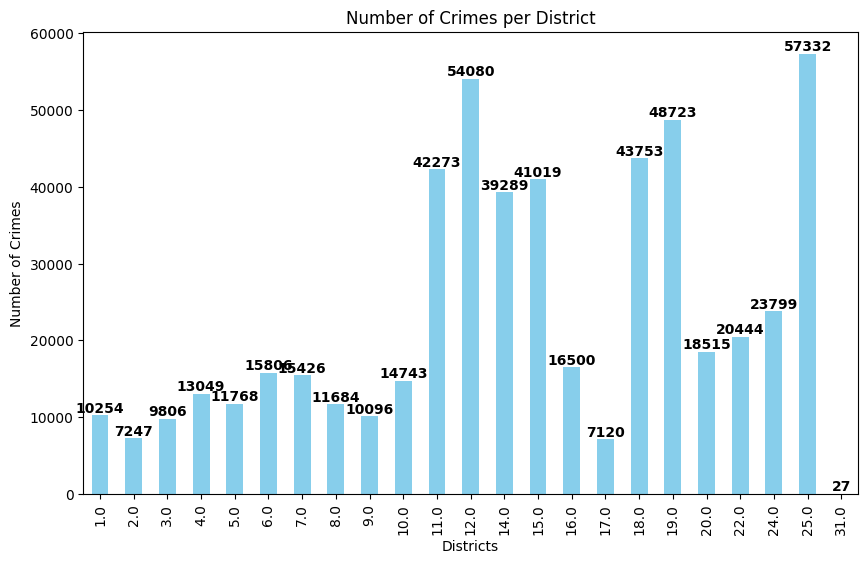

In [3]:
# Read the CSV file
data = pd.read_csv('Resources/Crimes_2015toPresent.csv')

# Group the data by District and count the number of rows (crimes) in each district
district_counts = data['District'].value_counts().sort_index()

# plot
plt.figure(figsize=(10, 6))
ax = district_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Districts')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per District')

# Labeling each bar with the number of crimes
for i, v in enumerate(district_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# display plot
plt.show()


Plotting on a Map the Recorded Crimes with Different Colors Per District.

C:\Users\Ya boi Saber\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


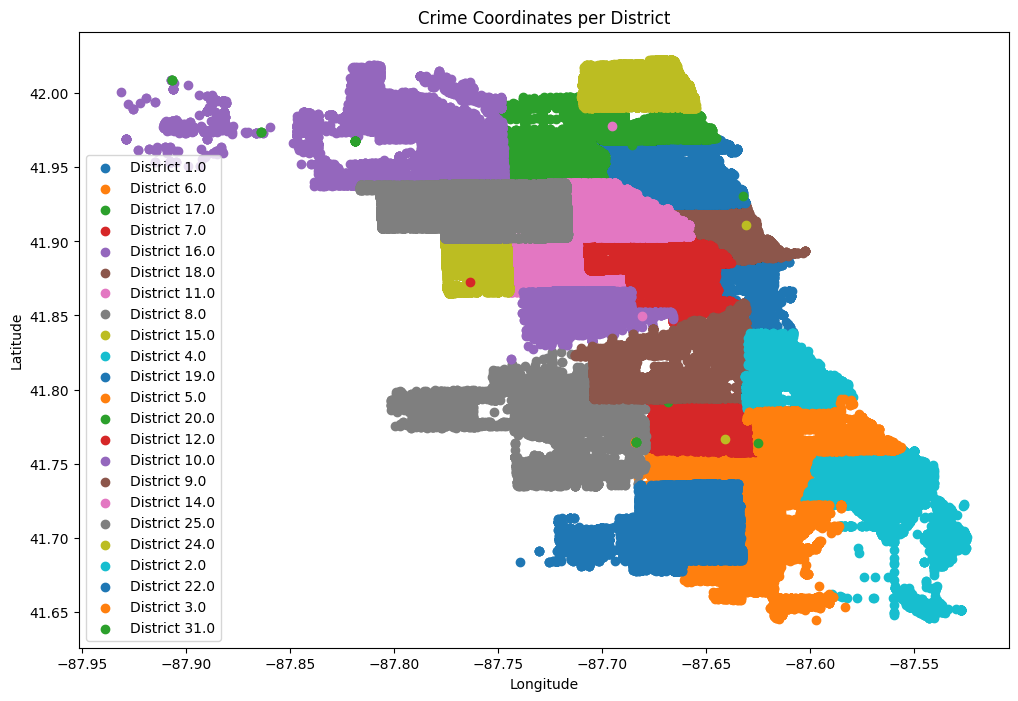

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('Resources/Crimes_2015toPresent.csv')


# Filter data where Arrest is True
arrest_data = data[data['Arrest'] == True]

# Get unique districts
districts = data['District'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))

# Iterate over districts
for district in districts:
    # Filter data for the current district
    district_data = data[data['District'] == district]
    
    # Plot the coordinates for the district with a different color
    plt.scatter(district_data['Longitude'], district_data['Latitude'], label=f"District {district}")

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Coordinates per District')

# Add legend
plt.legend()

# Display the plot
plt.show()


A Heat Map for Seeing the Concentrated Areas Where Arrests are Made

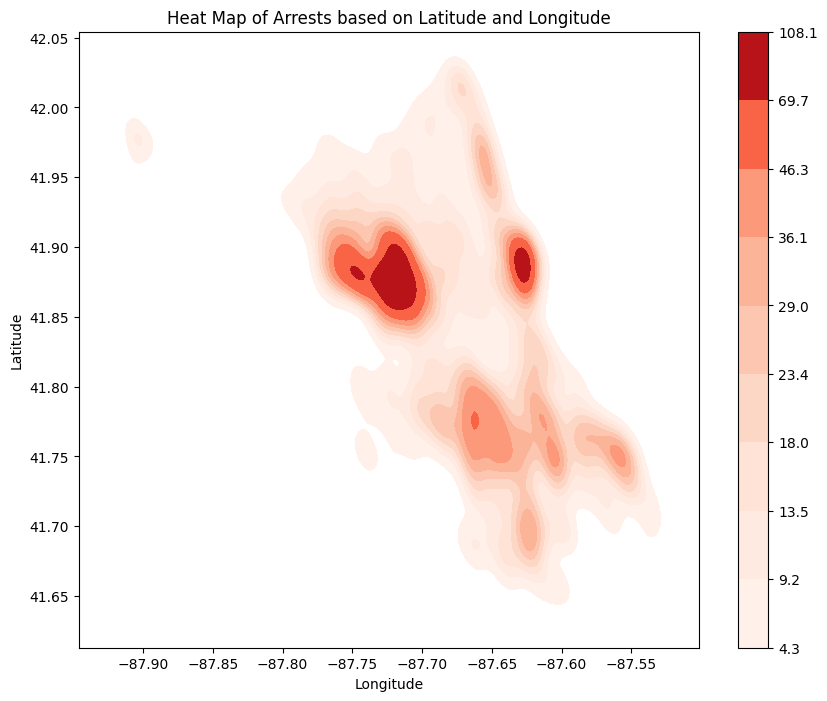

In [22]:
# Filter data where Arrest is True and remove null/invalid values from Arrest, Latitude, and Longitude columns
arrest_data = data.dropna(subset=['Arrest', 'Latitude', 'Longitude'])
arrest_data = arrest_data[arrest_data['Arrest'] == True]

# The errors='coerce' argument tells the pd.to_numeric() function to convert any non-numeric values to NaN (Not a Number) instead of raising an error. 
arrest_data[['Latitude', 'Longitude']] = arrest_data[['Latitude', 'Longitude']].apply(pd.to_numeric, errors='coerce')
arrest_data = arrest_data.dropna(subset=['Latitude', 'Longitude'])

# Set up the plot
plt.figure(figsize=(10, 8))
sns.kdeplot(data=arrest_data, x='Longitude', y='Latitude', cmap='Reds', fill=True, cbar=True)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heat Map of Arrests based on Latitude and Longitude')

plt.show()
